# Kapittel 14

In [1]:
# Import
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# OverflateSvampen.m

# Skript som brukar trapesmetoden til å rekne ut overflata
# av eit vasstårn ut frå ein gitt modell for profilen

# Grenser (høgda)
a = 0
b = 60

def r(x):
    """Profil på tårn"""
    return 5+4/(1+np.exp((35-x)/1.5))*(np.sqrt(np.abs(x))-np.sqrt(30))**2

dx = 1e-3
def rd(x):
    """Derivert"""
    return (r(x+dx)-r(x-dx))/(2*dx)

def f(x):
    """Integrand"""
    return r(x) * np.sqrt(1+rd(x)**2)

# Oppdeling
#n=input('Gi oppdelinga n: ')
n = 10
h = (b-a)/n                  # Steglengda

# Bidrag frå endane
T = h/2*(f(a)+f(b))

# Resten av bidraga
for i in range(1, n):
    xi = a+i*h
    T = T+h*f(xi)

# Skriv overflata til skjerm
overflate = 2*np.pi*T
print(f'overflate = {overflate:.2f}')

overflate = 4096.69


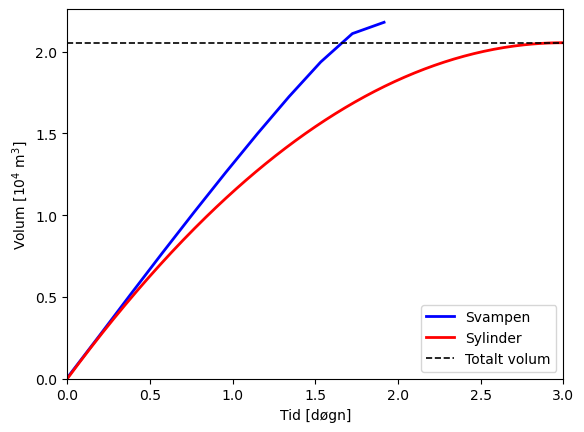

In [3]:
# PlottVassforbruk.m

# Skript som reknar ut vassforbruket som funksjon av tid for ein
# tank som blir tømd. 
# Profilen til tanken er gitt ved R(x) under.
# Vi tar utgongspunkt i Torrichellis lov, V'(t) = -k sqrt(h), for
# å bestemme høgda som funksjona av tid, som vi i sin tur brukar
# til å bestemme volumet av det som har runne ut ved integrasjon.

# Startkrav:
t0 = 0
tf = 1.9160
h0 = 60

t = t0
h = h0
volum = 0

# Parametrar
v_tot = 2.0547e+04
# Konstanten k:
k = 2*v_tot/(3*np.sqrt(h0))

def r(x):
    """Profil-funksjon"""
    return 5+4/(1+np.exp((35-x)/1.5))*(np.sqrt(x)-np.sqrt(30))**2

def F(x):
    """Høgresida i differensaillikninga h'=F(h)"""
    return -k*np.sqrt(x)/(np.pi*r(x)**2)

# Oppdeling i Eulers-metode og Riemann-integrasjon
#N=input('Oppdelinga: ')
N = 10
dt = (tf-t0)/N

# Vektorar til plotting
t_vektor = np.arange(t0, tf+dt, dt)
h_vektor = np.zeros(N+1)
h_vektor[0] = h0
volum_vektor = np.zeros(N+1)
volum_vektor[0] = h0

for n in range(0, N):
    h = h+F(h)*dt                      # Eulers meotde
    h_vektor[n+1] = h
    volum = volum+k*np.sqrt(h)*dt      # Oppdaterar volum ved eit Riemann-integral
    volum_vektor[n+1] = volum

# Plottar resultatet
plt.plot(t_vektor, np.real(volum_vektor)/1e4, 'b-', linewidth=2, label="Svampen")

# Plottar tilsvarende funksjon for sylindertårnet
h = 60                                 # Høgde

def syl_funk(t):
    """Funksjon for vasshøgda i sylindertårn"""
    return (np.sqrt(h)-k*h/2/v_tot*t)**2
    
xx = np.arange(0, 3 + 1e-2, 1e-2)      # Tids-vektor
# Volum: Høgd gange grunnflate, grunnflata er totalvolum delt å høgda
plt.plot(xx, (v_tot-syl_funk(xx)*v_tot/h)/1e4, 'r-', linewidth=2, label="Sylinder")

# Linje som markerar totalvolumet
plt.plot(np.array([0, 3]), np.array([v_tot, v_tot])/1e4, 'k--', linewidth=1.2, label="Totalt volum")

# Forklarar grafane
plt.legend(loc="lower right")

# Tekst på aksane
plt.xlabel('Tid [døgn]')
plt.ylabel('Volum [$10^4$ m$^3$]')

# Justerar aksane
plt.axis(np.array([0, 3, 0, 1.1*v_tot/1e4]))

# Justerar skriftstorleiken
plt.rcParams.update({'font.size': 15})

In [4]:
# ToemmeTank.m

# Skript som bestemmer kor lang tid det å tømme ein tank.
# Profilen til tanken er gitt ved R(x) under.
# Vi tar utgangspunkt i Torricellis lov, V'(t) = -k sqrt(h).

# Startkrav:
t0 = 0
h0 = 60
t = t0
h = h0

# Parametrar
v_tot = 2.0547e+04
k = 2*v_tot/(3*np.sqrt(h0))

def r(x):
    """Profilfunksjon"""
    return 5+4/(1+np.exp((35-x)/1.5))*(np.sqrt(x)-np.sqrt(30))**2

def F(x):
    """Høgresida i differensiallikninga"""
    return -k*np.sqrt(x)/(np.pi*r(x)**2)

# Steglengde
#dt=input('Steglengda i tid: ')
dt = 0.5

while h > 0:
    h = h+F(h)*dt       # Eulers metode
    t = t+dt

# Skriv slutttida til skjerm
print(f't = {t:.2f}')

t = 2.50


In [5]:
# VolumSvampen.m

# Skript som brukar trapesmetoden til å rekne ut volumet
# av eit vasstårn ut frå ein gitt modell for profilen

# Grenser (høgda)
a = 0
b = 60

def r(x):
    """Profil på tårn"""
    return 5+4/(1+np.exp((35-x)/1.5))*(np.sqrt(x)-np.sqrt(30))**2
    
def f(x):
    """Integrand"""
    return r(x)**2

# Oppdeling
#n=input('Gi oppdelinga n: ')
n = 10
h = (b-a)/n                  # Steglengda

# Bidrag frå endane
T = h/2*(f(a)+f(b))

# Resten av bidraga
for i in range(1, n):
    xi = a+i*h
    T = T+h*f(xi)

# Skriv volumet til skjerm
volum = np.pi*T
print(f'volum = {volum:.2f}')

volum = 21107.85
